In [2]:
path = "d:/VOD/OUT_IMG/AW/010/[D] 0AV/pose_recording.avi"

In [3]:
import cv2
from ultralytics import YOLO

In [4]:
import ultralytics

In [5]:
model = YOLO("yolo11n-pose.pt")

In [8]:
rotated_video_path = "rotated_pose_recording.avi"

In [9]:
# Rotate the video file
def rotate_video(input_path, output_path):
    cap = cv2.VideoCapture(input_path)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = None

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Rotate the frame
        rotated_frame = cv2.rotate(frame, cv2.ROTATE_90_COUNTERCLOCKWISE)
        if out is None:
            height, width = rotated_frame.shape[:2]
            out = cv2.VideoWriter(output_path, fourcc, 30.0, (width, height))
        out.write(rotated_frame)

    cap.release()
    out.release()

# Rotate the video file
rotate_video(path, rotated_video_path)

In [10]:
# Predict with the model

results = model(rotated_video_path, stream=True)  # predict on an image

In [9]:
def show_results():
    for result in results:
        # Rotate the image
        # Draw the pose on the image
        result.plot()

        # Show the image with the pose
        cv2.imshow("Pose", result.plot())
        cv2.waitKey(1)
    cv2.destroyAllWindows()

In [ ]:
show_results()

In [5]:
model_s = YOLO("yolo11s-pose.pt")

In [14]:
# Predict with the model

results = model_s(rotated_video_path, stream=True)  # predict on an image

In [15]:
show_results()


video 1/1 (frame 1/699) D:\Hakiko\intelligent_signal_processing_lectures\intelligent-signal-processing-lectures\Lec04\rotated_pose_recording.avi: 640x384 1 person, 87.3ms
video 1/1 (frame 2/699) D:\Hakiko\intelligent_signal_processing_lectures\intelligent-signal-processing-lectures\Lec04\rotated_pose_recording.avi: 640x384 1 person, 26.3ms
video 1/1 (frame 3/699) D:\Hakiko\intelligent_signal_processing_lectures\intelligent-signal-processing-lectures\Lec04\rotated_pose_recording.avi: 640x384 1 person, 38.1ms
video 1/1 (frame 4/699) D:\Hakiko\intelligent_signal_processing_lectures\intelligent-signal-processing-lectures\Lec04\rotated_pose_recording.avi: 640x384 1 person, 22.1ms
video 1/1 (frame 5/699) D:\Hakiko\intelligent_signal_processing_lectures\intelligent-signal-processing-lectures\Lec04\rotated_pose_recording.avi: 640x384 1 person, 17.8ms
video 1/1 (frame 6/699) D:\Hakiko\intelligent_signal_processing_lectures\intelligent-signal-processing-lectures\Lec04\rotated_pose_recording.avi

## Image

In [6]:
image_path = "img_2.png"

In [7]:
results = model_s(image_path)


image 1/1 D:\Hakiko\intelligent_signal_processing_lectures\intelligent-signal-processing-lectures\Lec04\img_2.png: 640x480 5 persons, 92.2ms
Speed: 3.7ms preprocess, 92.2ms inference, 105.4ms postprocess per image at shape (1, 3, 640, 480)


In [8]:
show_results()

NameError: name 'show_results' is not defined

In [12]:
import matplotlib.pyplot as plt

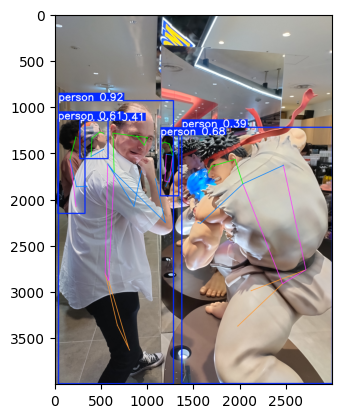

In [14]:
for result in results:
    # Draw the pose on the image
    result.plot()
    # Show the image with the pose as here in jupyter notebook
    # Resuze the image to fit the screen
    result_img = result.plot()
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))

